# Выбор локации для скважины

Допустим, вы работаете в добывающей компании «ГлавРосГосНефть». Нужно решить, где бурить новую скважину.

Вам предоставлены пробы нефти в трёх регионах: в каждом 10 000 месторождений, где измерили качество нефти и объём её запасов. Постройте модель машинного обучения, которая поможет определить регион, где добыча принесёт наибольшую прибыль. Проанализируйте возможную прибыль и риски техникой *Bootstrap.*

Шаги для выбора локации:

- В избранном регионе ищут месторождения, для каждого определяют значения признаков;
- Строят модель и оценивают объём запасов;
- Выбирают месторождения с самым высокими оценками значений. Количество месторождений зависит от бюджета компании и стоимости разработки одной скважины;
- Прибыль равна суммарной прибыли отобранных месторождений.

## Загрузка и подготовка данных

### Загрузка модулей

In [1]:
import pandas as pd
#from pandas_profiling import ProfileReport
import sweetviz as sv

from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier, plot_tree

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, OrdinalEncoder


from sklearn.metrics import mean_squared_error

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import random

### Настройки

In [2]:
RANDOM_STATE = 12345
state = np.random.RandomState(RANDOM_STATE)
# Цветовая палитра документа
cm = 'crest'
mec = 'gray'
alpha = 0.7
fontsize = 14
figsize_base = 5

def new_color(x='r'):
    '''Цвет графиков, по умолчанию случайный из заданной цветовой палитры. Принимает в качестве аргумента число, \
    соответствующее цвету в палитре.'''
    if x == 'r':
        return list(sns.color_palette(cm, 20)[random.randint(0,19)])
    return list(sns.color_palette(cm, 20)[x])
# Размеры

def figsize(width = 1, height=1):
    '''Задание размеров окна отрисовки.'''
    return (width*figsize_base, height*figsize_base)

# Отрисовка 
def plot_set(ax,title='',xlabel='',ylabel='',fontsize=fontsize,xrot=True,figsize=figsize()):
    '''Функция для отрисовки дополнительных параметров графиков. Подписьи осей и названия, размер шрифта и размер окна, 
    включение сетки.'''
    plt.xticks(rotation=90*int(xrot), fontsize=fontsize)
    plt.yticks(fontsize=fontsize)
    plt.title(title+'\n', fontsize=fontsize)
    plt.xlabel('\n'+xlabel, fontsize=fontsize)
    plt.ylabel(ylabel+'\n', fontsize=fontsize)
    plt.grid(True)
    None
    
def mean_percent(x):
    '''Функция для форматирования значений. Округление до сотых и знак процента.'''
    try:
        return "{0:.2%}".format(x)
    except:
        return x

### Загрузка данных

#### Первый регион

In [3]:
df_0 = pd.read_csv('geo_data_0.csv')

In [4]:
df_0.head(25)

,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647
5,wX4Hy,0.969570,0.489775,-0.735383,64.741541
6,tL6pL,0.645075,0.530656,1.780266,49.055285
7,BYPU6,-0.400648,0.808337,-5.624670,72.943292
8,j9Oui,0.643105,-0.551583,2.372141,113.356160
9,OLuZU,2.173381,0.563698,9.441852,127.910945


In [5]:
#profile = ProfileReport(df_0)
#profile.to_widgets()

In [6]:
df_0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [7]:
#report = sv.analyze([df_0, 'Unique ids and roles'])
#report.show_notebook()

In [8]:
df_0.duplicated().sum()

0

In [9]:
df_0.describe()

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.500419,0.250143,2.502647,92.500000
std,0.871832,0.504433,3.248248,44.288691
min,-1.408605,-0.848218,-12.088328,0.000000
25%,-0.072580,-0.200881,0.287748,56.497507
50%,0.502360,0.250252,2.515969,91.849972
75%,1.073581,0.700646,4.715088,128.564089
max,2.362331,1.343769,16.003790,185.364347


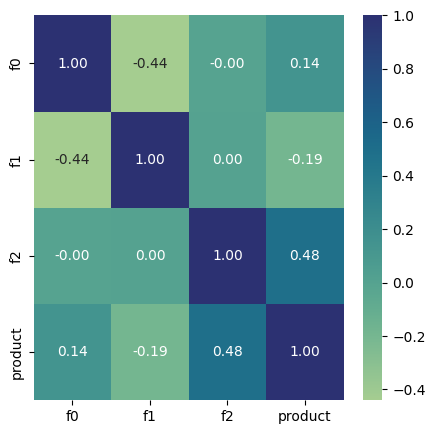

In [10]:
plt.figure(figsize=figsize())
sns.heatmap(df_0[['f0', 'f1', 'f2', 'product']].corr(), annot=True, cmap=cm, fmt='.2f')
None

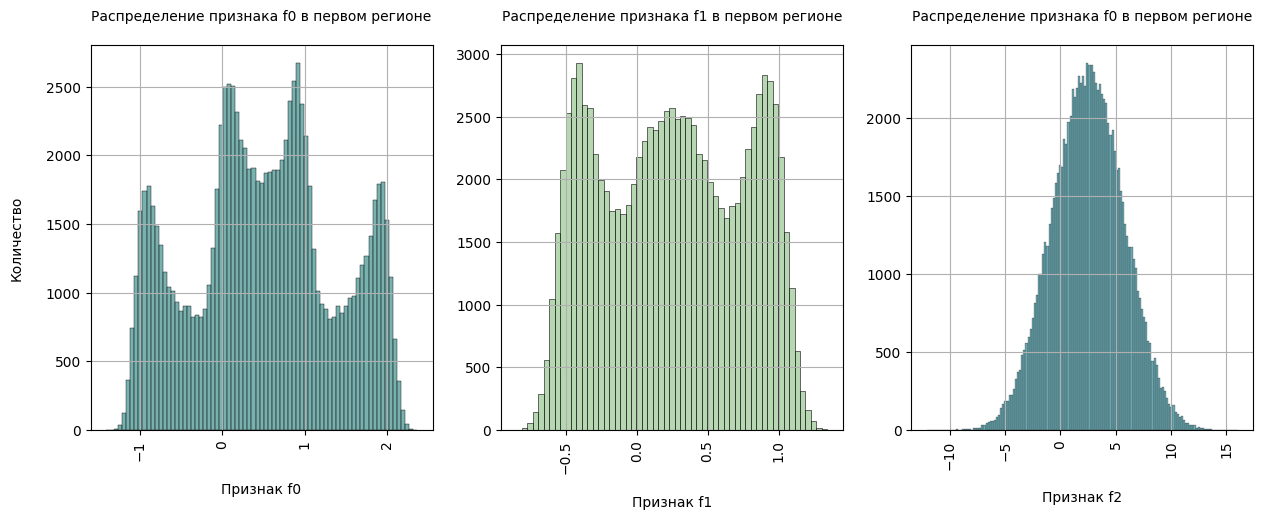

In [11]:
plt.figure(figsize=figsize(3))
ax1 = plt.subplot(1,3,1)
sns.histplot(df_0['f0'],color=new_color(),alpha=alpha)
plot_set(ax1,title='Распределение признака f0 в первом регионе',xlabel='Признак f0',ylabel='Количество',fontsize=10)
ax1 = plt.subplot(1,3,2)
sns.histplot(df_0['f1'],color=new_color(),alpha=alpha)
plot_set(ax1,title='Распределение признака f1 в первом регионе',xlabel='Признак f1',fontsize=10)
ax1 = plt.subplot(1,3,3)
sns.histplot(df_0['f2'],color=new_color(),alpha=alpha)
plot_set(ax1,title='Распределение признака f0 в первом регионе',xlabel='Признак f2',fontsize=10)

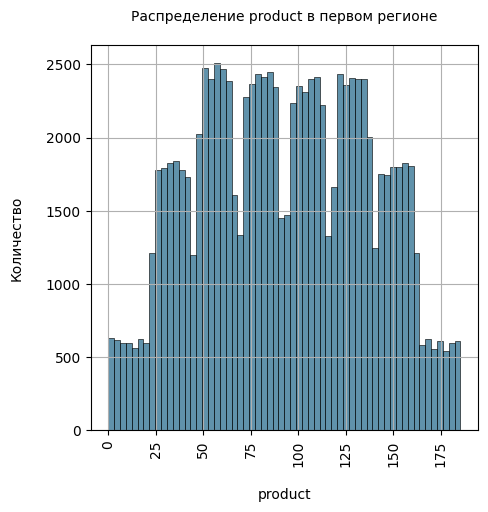

In [12]:
plt.figure(figsize=figsize())
sns.histplot(df_0['product'],color=new_color(),alpha=alpha)
plot_set(ax1,title='Распределение product в первом регионе',xlabel='product',ylabel='Количество',fontsize=10)

#### Второй регион

In [13]:
df_1 = pd.read_csv('geo_data_1.csv')

In [14]:
#profile = ProfileReport(df_1)
#profile.to_widgets()

In [15]:
df_1.head(25)

,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261
2,vyE1P,6.263187,-5.948386,5.001160,134.766305
3,KcrkZ,-13.081196,-11.506057,4.999415,137.945408
4,AHL4O,12.702195,-8.147433,5.004363,134.766305
5,HHckp,-3.327590,-2.205276,3.003647,84.038886
6,h5Ujo,-11.142655,-10.133399,4.002382,110.992147
7,muH9x,4.234715,-0.001354,2.004588,53.906522
8,YiRkx,13.355129,-0.332068,4.998647,134.766305
9,jG6Gi,1.069227,-11.025667,4.997844,137.945408


In [16]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [17]:
df_1.duplicated().sum()

0

In [18]:
df_1.describe()

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.141296,-4.796579,2.494541,68.825000
std,8.965932,5.119872,1.703572,45.944423
min,-31.609576,-26.358598,-0.018144,0.000000
25%,-6.298551,-8.267985,1.000021,26.953261
50%,1.153055,-4.813172,2.011479,57.085625
75%,8.621015,-1.332816,3.999904,107.813044
max,29.421755,18.734063,5.019721,137.945408


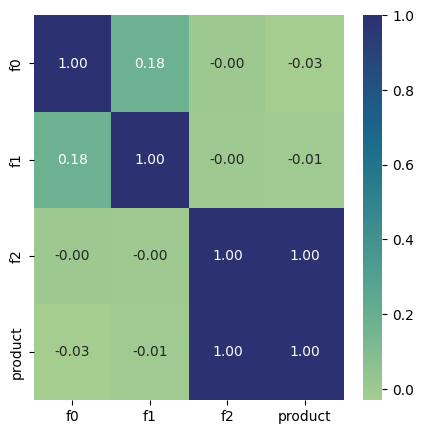

In [19]:
plt.figure(figsize=figsize())
sns.heatmap(df_1[['f0', 'f1', 'f2', 'product']].corr(), annot=True, cmap=cm, fmt='.2f')
None

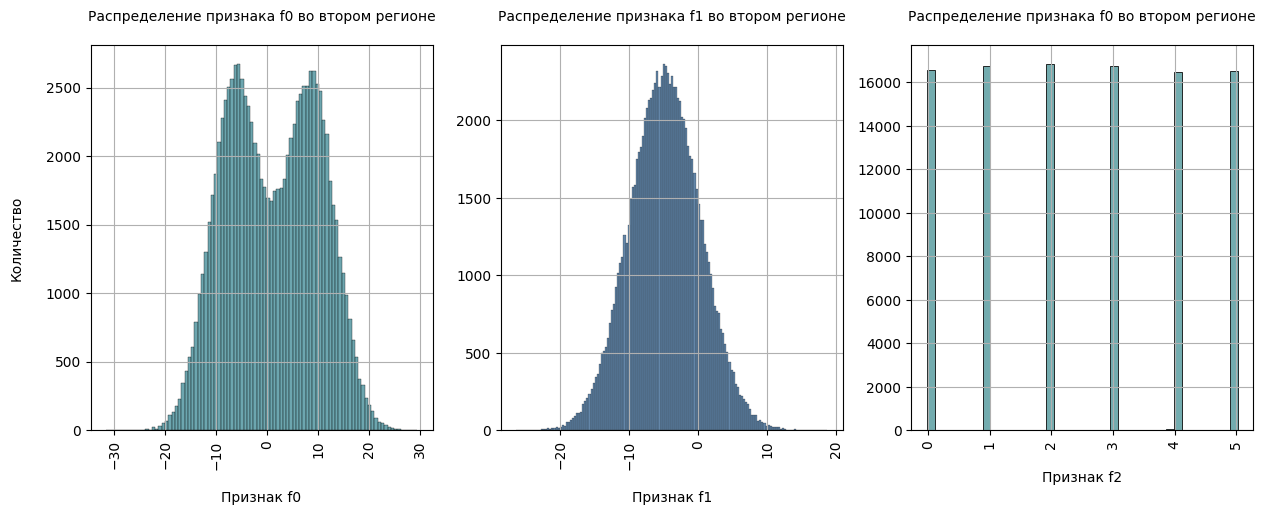

In [20]:
plt.figure(figsize=figsize(3))
ax1 = plt.subplot(1,3,1)
sns.histplot(df_1['f0'],color=new_color(),alpha=alpha)
plot_set(ax1,title='Распределение признака f0 во втором регионе',xlabel='Признак f0',ylabel='Количество',fontsize=10)
ax1 = plt.subplot(1,3,2)
sns.histplot(df_1['f1'],color=new_color(),alpha=alpha)
plot_set(ax1,title='Распределение признака f1 во втором регионе',xlabel='Признак f1',fontsize=10)
ax1 = plt.subplot(1,3,3)
sns.histplot(df_1['f2'],color=new_color(),alpha=alpha)
plot_set(ax1,title='Распределение признака f0 во втором регионе',xlabel='Признак f2',fontsize=10)

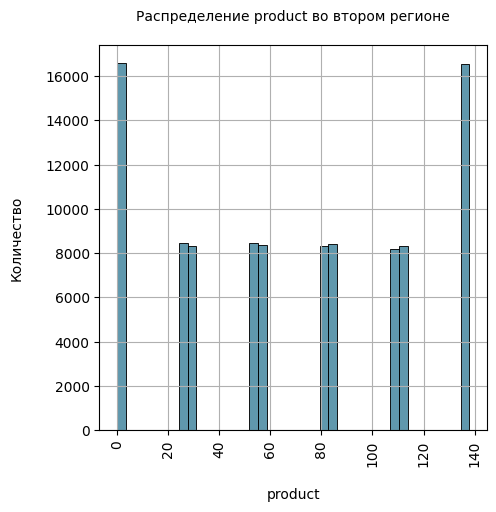

In [21]:
plt.figure(figsize=figsize())
sns.histplot(df_1['product'],color=new_color(),alpha=alpha)
plot_set(ax1,title='Распределение product во втором регионе',xlabel='product',ylabel='Количество',fontsize=10)

#### Третий регион

In [22]:
df_2 = pd.read_csv('geo_data_2.csv')

In [23]:
#profile = ProfileReport(df_2)
#profile.to_widgets()

In [24]:
df_2.head(25)

,id,f0,f1,f2,product
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673
1,WJtFt,0.262778,0.269839,-2.530187,56.069697
2,ovLUW,0.194587,0.289035,-5.586433,62.871910
3,q6cA6,2.236060,-0.553760,0.930038,114.572842
4,WPMUX,-0.515993,1.716266,5.899011,149.600746
5,LzZXx,-0.758092,0.710691,2.585887,90.222465
6,WBHRv,-0.574891,0.317727,1.773745,45.641478
7,XO8fn,-1.906649,-2.458350,-0.177097,72.480640
8,ybmQ5,1.776292,-0.279356,3.004156,106.616832
9,OilcN,-1.214452,-0.439314,5.922514,52.954532


In [25]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [26]:
df_2.duplicated().sum()

0

In [27]:
df_2.describe()

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.002023,-0.002081,2.495128,95.000000
std,1.732045,1.730417,3.473445,44.749921
min,-8.760004,-7.084020,-11.970335,0.000000
25%,-1.162288,-1.174820,0.130359,59.450441
50%,0.009424,-0.009482,2.484236,94.925613
75%,1.158535,1.163678,4.858794,130.595027
max,7.238262,7.844801,16.739402,190.029838


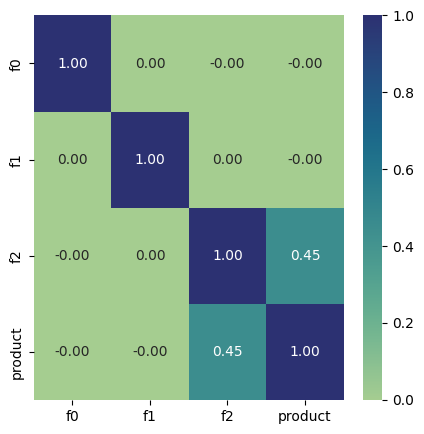

In [28]:
plt.figure(figsize=figsize())
sns.heatmap(df_2[['f0', 'f1', 'f2', 'product']].corr(), annot=True, cmap=cm, fmt='.2f')
None

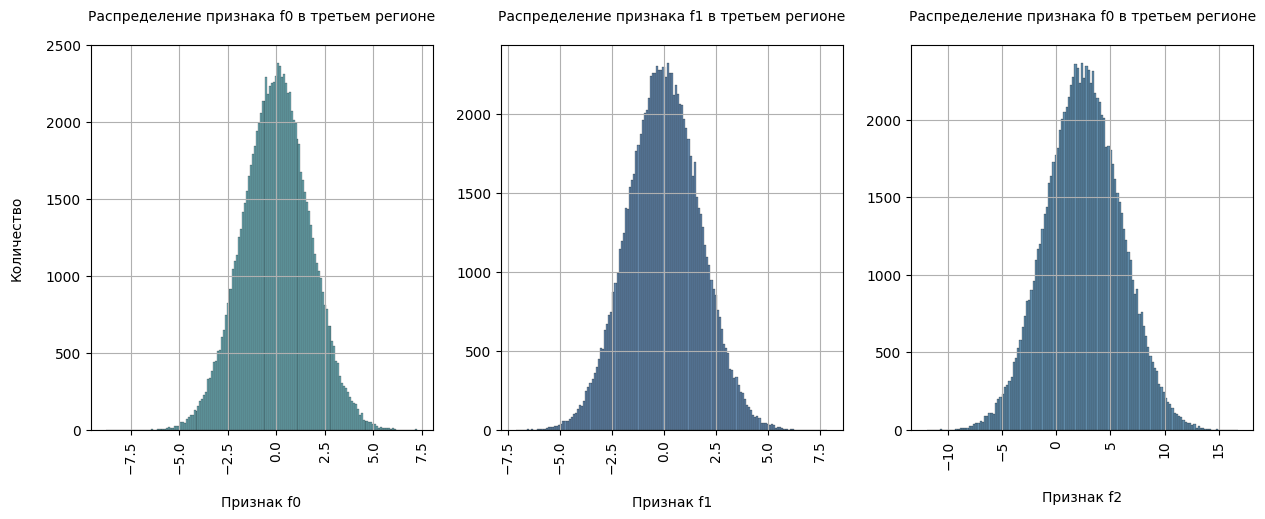

In [29]:
plt.figure(figsize=figsize(3))
ax1 = plt.subplot(1,3,1)
sns.histplot(df_2['f0'],color=new_color(),alpha=alpha)
plot_set(ax1,title='Распределение признака f0 в третьем регионе',xlabel='Признак f0',ylabel='Количество',fontsize=10)
ax1 = plt.subplot(1,3,2)
sns.histplot(df_2['f1'],color=new_color(),alpha=alpha)
plot_set(ax1,title='Распределение признака f1 в третьем регионе',xlabel='Признак f1',fontsize=10)
ax1 = plt.subplot(1,3,3)
sns.histplot(df_2['f2'],color=new_color(),alpha=alpha)
plot_set(ax1,title='Распределение признака f0 в третьем регионе',xlabel='Признак f2',fontsize=10)

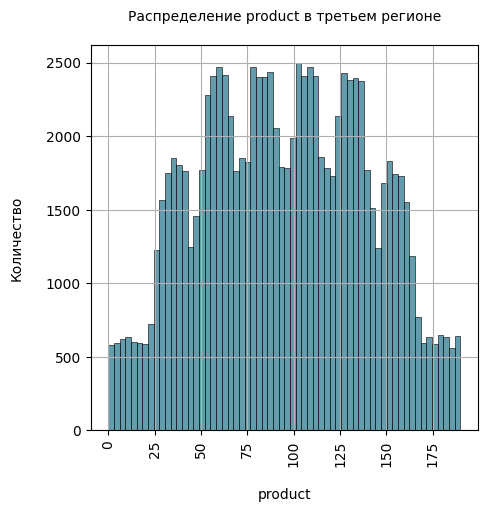

In [30]:
plt.figure(figsize=figsize())
sns.histplot(df_2['product'],color=new_color(),alpha=alpha)
plot_set(ax1,title='Распределение product в третьем регионе',xlabel='product',ylabel='Количество',fontsize=10)

In [31]:
df_0.drop(columns='id', inplace=True)
df_1.drop(columns='id', inplace=True)
df_2.drop(columns='id', inplace=True)

Загружены и исследованы данные датафреймов `geo_data_0.csv` `geo_data_1.csv` `geo_data_2.csv`. Данные хорошо подготовлены, нет пропусков, дубликатов.

Удалён столбец с названием скважины `id`.

Матрицы корреляции Пирсона показывают высокую зависимость показателя объёма запасов нефти от признака `f2` для первого и третьего региона. Для второго региона зависимость прямая и линейная. Для остальных признаков корреляции с объёмами запасов не наблюдается.

## Обучение и проверка модели

In [32]:
def ml_for_geo_datas(df):
    target = df['product']
    features = df.drop('product', axis=1)
    features_train, features_valid, target_train, target_valid = train_test_split(
        features, target,
        test_size=0.25,
        random_state=RANDOM_STATE)
    scaler = StandardScaler()
    scaler.fit(features_train)
    features_train = scaler.transform(features_train)
    features_valid = scaler.transform(features_valid)
    model = LinearRegression()
    model.fit(features_train, target_train)
    predict_valid = pd.Series(model.predict(features_valid), index=target_valid.index)
    print(f'Средний запас фактического сырья = {target_valid.mean():.2f} тыс. баррелей')
    print(f'Средний запас предсказанного сырья = {predict_valid.mean():.2f} тыс. баррелей')
    print(f'Разница = {(1-predict_valid.mean()/target_valid.mean()):.2%}')
    print(f'RMSE модели = {(mean_squared_error(predict_valid, target_valid)**0.5):.2f} тыс. баррелей')
    return target_valid, predict_valid

In [33]:
print('Первый регион:')
target_valid_0, predict_valid_0 = ml_for_geo_datas(df_0)

Первый регион:
Средний запас фактического сырья = 92.08 тыс. баррелей
Средний запас предсказанного сырья = 92.59 тыс. баррелей
Разница = -0.56%
RMSE модели = 37.58 тыс. баррелей


In [34]:
print('Второй регион:')
target_valid_1, predict_valid_1 = ml_for_geo_datas(df_1)

Второй регион:
Средний запас фактического сырья = 68.72 тыс. баррелей
Средний запас предсказанного сырья = 68.73 тыс. баррелей
Разница = -0.01%
RMSE модели = 0.89 тыс. баррелей


In [35]:
print('Третий регион:')
target_valid_2, predict_valid_2 = ml_for_geo_datas(df_2)

Третий регион:
Средний запас фактического сырья = 94.88 тыс. баррелей
Средний запас предсказанного сырья = 94.97 тыс. баррелей
Разница = -0.09%
RMSE модели = 40.03 тыс. баррелей


Предсказания несколько завышены. Наибольшая точность достигается для второго региона.

## Подготовка к расчёту прибыли

In [36]:
POINTS_TO_EST = 500
BEST_FOR_DEV = 200
BUDGET = 10e9
BARREL_PRICE = 450e3

In [37]:
edge = BUDGET/(BARREL_PRICE*BEST_FOR_DEV)
print(f'Граница окупаемости {edge:.2f} тыс. баррелей c каждой скважины.')

Граница окупаемости 111.11 тыс. баррелей c каждой скважины.


In [38]:
def mean_geo_datas(df):
    plt.figure(figsize=figsize())
    ax1 = sns.histplot(df['product'],color=new_color(),alpha=alpha)
    plot_set(ax1,title='Распределение объёмов',xlabel='объём, тыс. баррелей',ylabel='Количество',fontsize=10) 
    plt.axvline(x = edge, color = 'b',linewidth=3)
    print(f'Средний запас {df["product"].mean():.2f} тыс. баррелей.')
    print(f'Процент скважин с объёмом больше чем порог = {len(df[df["product"]>edge])/len(df):.2%}')
    print(f'Количество скважин в объёмом больше чем порог = {len(df[df["product"]>edge])}')

Первый регион:
Средний запас 92.50 тыс. баррелей.
Процент скважин с объёмом больше чем порог = 36.58%
Количество скважин в объёмом больше чем порог = 36583


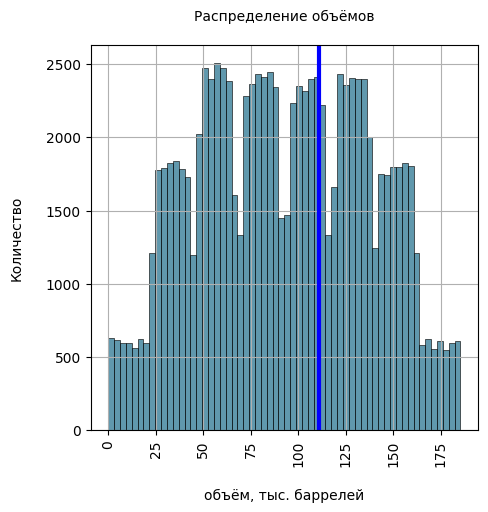

In [39]:
print('Первый регион:')
mean_geo_datas(df_0)

Второй регион:
Средний запас 68.83 тыс. баррелей.
Процент скважин с объёмом больше чем порог = 16.54%
Количество скважин в объёмом больше чем порог = 16537


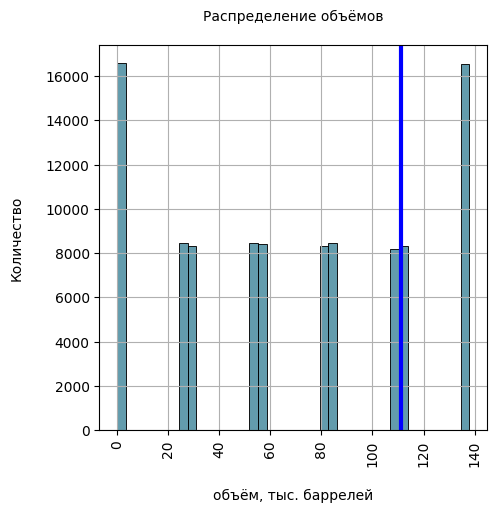

In [40]:
print('Второй регион:')
mean_geo_datas(df_1)

Третий регион:
Средний запас 95.00 тыс. баррелей.
Процент скважин с объёмом больше чем порог = 38.18%
Количество скважин в объёмом больше чем порог = 38178


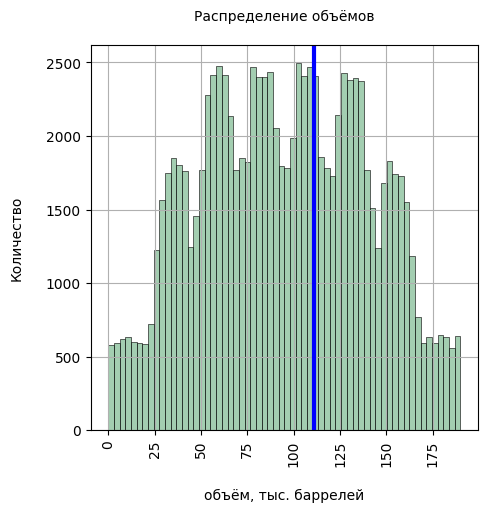

In [41]:
print('Третий регион:')
mean_geo_datas(df_2)

При текущих макропараметрах точка безубыточности составляет в среднем 111.11 тыс. баррелей на скважину, при этом средний запас в регионах лежит в промежутке 68-95 тыс. баррелей.

`200` из `500` скважин это `40%`. Процент скважин во всех регионах с запасами больше порога не доходит до `40%`.

Таким образом можно сделать вывод о том что для того чтобы вложения в разработку окупились, отобранные моделью скважины должны позволять добывать ощутимо больше порогового значения.

## Расчёт прибыли и рисков 

In [42]:
def revenue(target, probabilities, count):
    target = target.reset_index(drop=True)
    probabilities = probabilities.reset_index(drop=True)
    probs_sorted = probabilities.sort_values(ascending=False)[:count]
    selected = target[probs_sorted.index]
    return selected.sum() * BARREL_PRICE

In [43]:
def risk_geo_datas(target_valid, predict_valid):
    values = []
    risk = [0] * 5
    for _ in range(1000):
        target_subsample = target_valid.sample(POINTS_TO_EST, replace=True, random_state=state)
        probs_subsample = predict_valid[target_subsample.index]
        values.append(revenue(target_subsample, probs_subsample, BEST_FOR_DEV) - BUDGET)
        
    values = pd.Series(values)
    plt.figure(figsize=figsize(2))
    ax1 = sns.histplot(values/1e9,color=new_color(),alpha=alpha,kde=True)
    plot_set(ax1,title='Распределение прибыли',xlabel='Прибыль, млрд',ylabel='Количество',fontsize=10) 
    plt.axvline(x = values.mean() / 1e9, color = 'b',linewidth=3)
    risk[0] = values.mean() / 1e9
    risk[1] = (values.mean() + BUDGET) / BEST_FOR_DEV / BARREL_PRICE
    risk[2] = values.quantile(.025) / 1e9
    risk[3] = values.quantile(.975) / 1e9
    
    risk[4] = len(values[values<0]) / len(values)

    print(f'Средняя валовая прибыль  {risk[0]:.3f} млрд. рублей.')
    print(f'Средний объём добычи с одной скважины {risk[1]:.3f} тыс. баррелей.')
    print(f'Доверительный интервал лежит между {risk[2]:.3f} - {risk[3]:.3f} млрд. рублей.')
    print(f'Риск убытков составляет = {risk[4]:.2%}')
    return risk

In [44]:
target_valid, predict_valid = target_valid_0, predict_valid_0
target_subsample = target_valid.sample(POINTS_TO_EST, replace=True, random_state=state)
probs_subsample = predict_valid[target_subsample.index]

Первый регион:
Средняя валовая прибыль  0.396 млрд. рублей.
Средний объём добычи с одной скважины 115.506 тыс. баррелей.
Доверительный интервал лежит между -0.111 - 0.910 млрд. рублей.
Риск убытков составляет = 7.00%


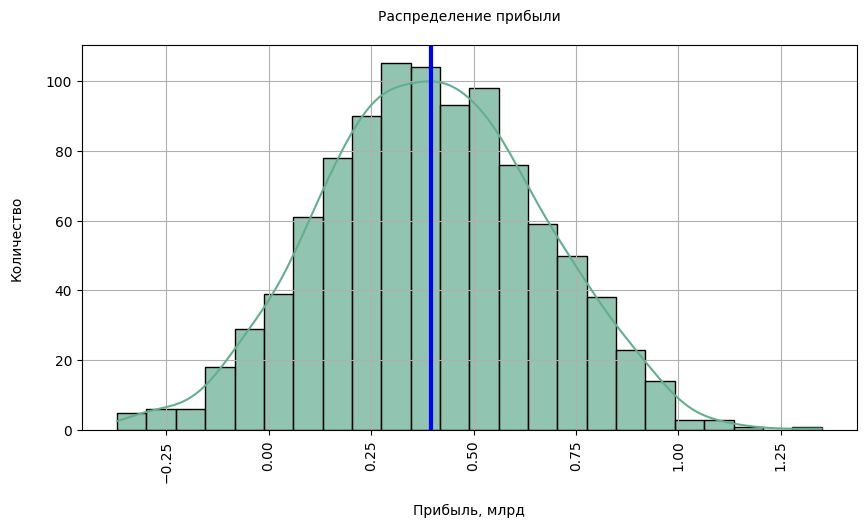

In [45]:
print('Первый регион:')
risk_0 = risk_geo_datas(target_valid_0, predict_valid_0)

Второй регион:
Средняя валовая прибыль  0.461 млрд. рублей.
Средний объём добычи с одной скважины 116.235 тыс. баррелей.
Доверительный интервал лежит между 0.078 - 0.863 млрд. рублей.
Риск убытков составляет = 0.70%


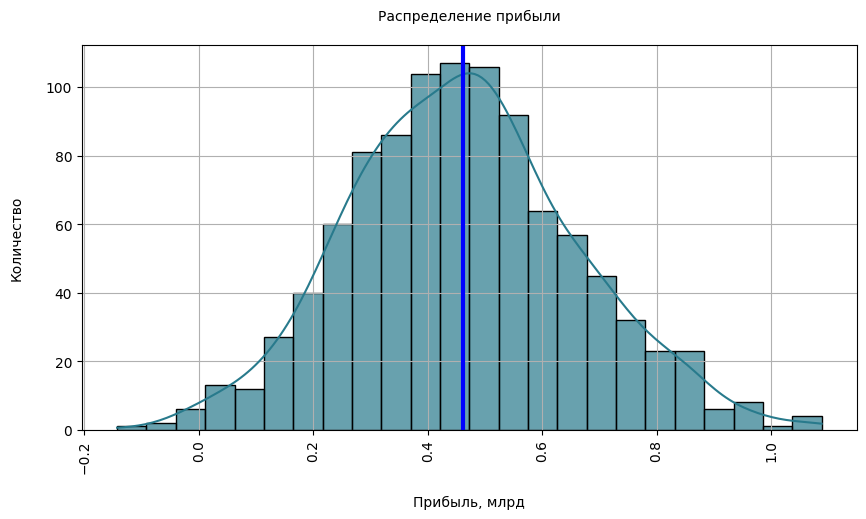

In [46]:
print('Второй регион:')
risk_1 = risk_geo_datas(target_valid_1, predict_valid_1)

Третий регион:
Средняя валовая прибыль  0.393 млрд. рублей.
Средний объём добычи с одной скважины 115.473 тыс. баррелей.
Доверительный интервал лежит между -0.112 - 0.935 млрд. рублей.
Риск убытков составляет = 6.50%


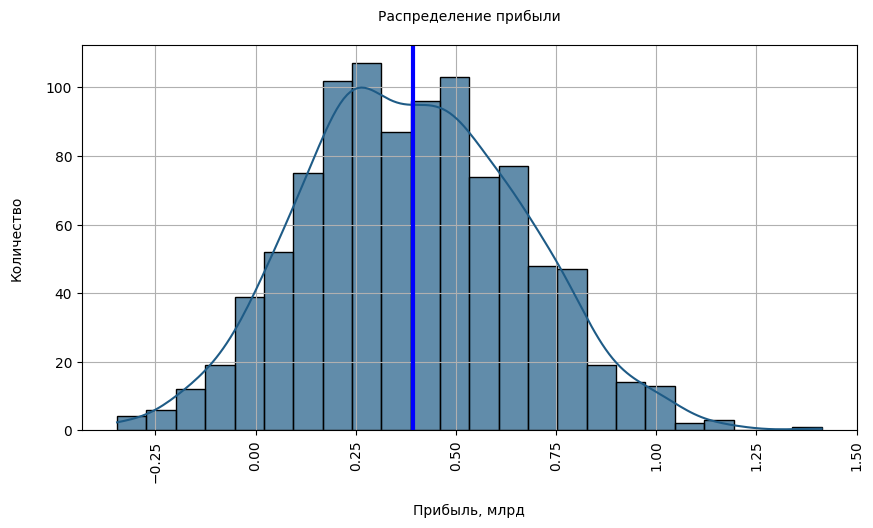

In [47]:
print('Третий регион:')
risk_2 = risk_geo_datas(target_valid_2, predict_valid_2)

In [48]:
df_risk = pd.DataFrame({'Регион 1': risk_0,
                           'Регион 2': risk_1,
                           'Регион 3': risk_2}, index = ['Прибыль (млрд)', "Объём (тыс. баррель)", 'q(.025)(млрд)', 'q(.975)(млрд)', 'Риск %']).T
df_risk['Риск %'] = df_risk['Риск %']*100

df_risk.style.background_gradient(cmap=cm)

,Прибыль (млрд),Объём (тыс. баррель),q(.025)(млрд),q(.975)(млрд),Риск %
Регион 1,0.395526,115.505840,-0.111216,0.909767,7.000000
Регион 2,0.461168,116.235199,0.078051,0.862952,0.700000
Регион 3,0.392579,115.473095,-0.112228,0.934563,6.500000


Согласно распределению среднего значения прибыли с региона, самым прибыльным оказался 2 регион, средняя прибыль в этом регионе составит  0.46 млрд прибыли против примерно 0.4 млрд в других регионах. Так же для данного региона наименьшие риски: `0.7%` против `7%` и `6.5%` в других регионах.

## Вывод

Загружены и исследованы данные датафреймов `geo_data_0.csv` `geo_data_1.csv` `geo_data_2.csv`. Данные хорошо подготовлены, нет пропусков, дубликатов.

Удалён столбец с названием скважины `id`.

Матрицы корреляции Пирсона показывают высокую зависимость показателя объёма запасов нефти от признака `f2` для первого и третьего региона. Для второго региона зависимость прямая и линейная. Для остальных признаков корреляции с объёмами запасов не наблюдается. 

Обнаружено, что средний запас ресурсов по регионам недостаточен даже для окупаемости вложений на разработку и для того, чтобы иметь уверенность в перспективе разработки по регионам. Для решения проблемы обучена модель и выполнены предсказания при помощи модели `LinearRegression`, а так же применена технология `bootstrap` с разделением каждого предсказанного значения прибыли по регионам на 1000 выборок.

По результату полученных данных определён доверительный интревал получения прибыли в `95%`.

Риски менее `2.5%` только для второго региона: `0.7%` против `7%` и `6.5%` в других регионах. Так же, второй регион может принести наибольшую прибыль: 0.46 млрд прибыли против примерно 0.4 млрд в других регионах.

Таким образом, наиболее перспективным регионом будем считать второй.